In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [220]:
from datasets import load_dataset



In [29]:
data= load_dataset ('csv', data_files =[ 'Corona_NLP_train.csv'])

Using custom data configuration default
Reusing dataset csv (C:\Users\Omona\.cache\huggingface\datasets\csv\default-cc4128f94856b4a8\0.0.0\49187751790fa4d820300fd4d0707896e5b941f1a9c644652645b866716a4ac4)


In [30]:
data = pd.DataFrame(data['train'])

In [118]:
data['OriginalTweet'][0]

b'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [221]:
#data_t.to_csv('new_corona_nlp')

In [23]:
data_t = pd.read_csv('new_corona_nlp')

In [24]:
data_t.drop(columns = ['Unnamed: 0'], inplace = True)

In [25]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37035 entries, 0 to 37034
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       37035 non-null  int64 
 1   ScreenName     37035 non-null  int64 
 2   Location       29242 non-null  object
 3   TweetAt        37035 non-null  object
 4   OriginalTweet  37035 non-null  object
 5   Sentiment      37035 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


In [26]:
data_t.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [27]:
#from pandas_profiling import ProfileReport

#report = ProfileReport(data_t)

#report.to_file(output = 'report.html')

In [28]:
#locaton_empty =  data_t.loc[lambda x: x['Location'] == '']

In [29]:
#datat_sorted = data_t.sort_values(['Sentiment'], ascending = False)

# Preprocessing


In [30]:
data_t['OriginalTweet'] = data_t.OriginalTweet.astype('string')

# Removing the irrelevant data from each row in the OriginalTweet column

In [31]:
extract_url = data_t.OriginalTweet.str.extract(r'(http\S+|www.\S+)')

In [32]:
extract_url.head()

,0
0,https://t.co/iFz9FAn2Pa
1,<NA>
2,https://t.co/bInCA9Vp8P'
3,"https://t.co/zrlG0Z520j"""
4,"https://t.co/usmuaLq72n"""


In [33]:
# removing all urls from each text row

data_t['OriginalTweet'] = data_t.OriginalTweet.str.replace('http\S+|www.\S+', '', case = False )

In [34]:
# reomving all user names, averaging username length at 7 characters

data_t['OriginalTweet'] =   data_t.OriginalTweet.str.replace('@.......', '', case = False, regex = True)

In [35]:
# looking at the text, there seems to be reoccuring gibberish text
# removing exact repetitions

gib = ['\\n', '\\r', '\\xc2', '\\92', '\\x92']

for i in gib:
    data_t['OriginalTweet'] = data_t.OriginalTweet.str.replace(i,'', case = False, regex = False )

In [36]:
# removing pattern repitiions

gib_pattern = ["b'", 'b"']

for i in gib_pattern:
    data_t['OriginalTweet'] = data_t.OriginalTweet.str.replace(i, '', case = False, regex = True)

# Removing punctuations and stop words

Punctuations

In [39]:
def remove_punctuation (text):
    import string
    
    translator =  str.maketrans('','', string.punctuation)
    return text.translate(translator)
    

In [40]:
data_t['OriginalTweet'] = data_t.OriginalTweet.apply(remove_punctuation)

In [41]:
from spacy.lang.en import STOP_WORDS

Socail media posts have common words or slangs used
Adding them to the stop words will reduce the numder of words to be used as feature 

Eg. lol, @


In [42]:
#slamg = set('lol', 'lmao','@', '#', '')

#STOP_WORDS.union

removing stop words and lemmatization 

In [43]:
def lemmatizer(text):
   
    return [word.lemma_ for word in nlp(text)]


stpw_str = " ".join(STOP_WORDS)
stop_words_lemma = set(word.lemma_ for word in nlp(stpw_str))

In [44]:
def stop_words(text):
    text1 = lemmatizer(text)
    new_text = [word.lower() for word in text1 if word.lower() not in stop_words_lemma]
    
    return ' '.join(new_text)
    

In [45]:
# because of the lemmatizer function, this takes quite a while to run

data_t['OriginalTweet'] = data_t.OriginalTweet.apply(stop_words)

In [111]:
#[ i for i in data_t['OriginalTweet'][0 :100] ]

In [48]:
from sklearn.feature_extraction.text import  CountVectorizer 

count_v = CountVectorizer()

count_v.fit(data_t['OriginalTweet'])

vocabulary_dic = count_v.vocabulary_.items()

In [64]:
count = []
vocab = []

for k,v in vocabulary_dic:
    vocab.append(k)
    count.append(v)
    
vocab_d = pd.Series(count , index = vocab)

vocab_d = vocab_d.sort_values(ascending = False)

In [126]:
vocab[45]

'confinementotal'

<AxesSubplot:>

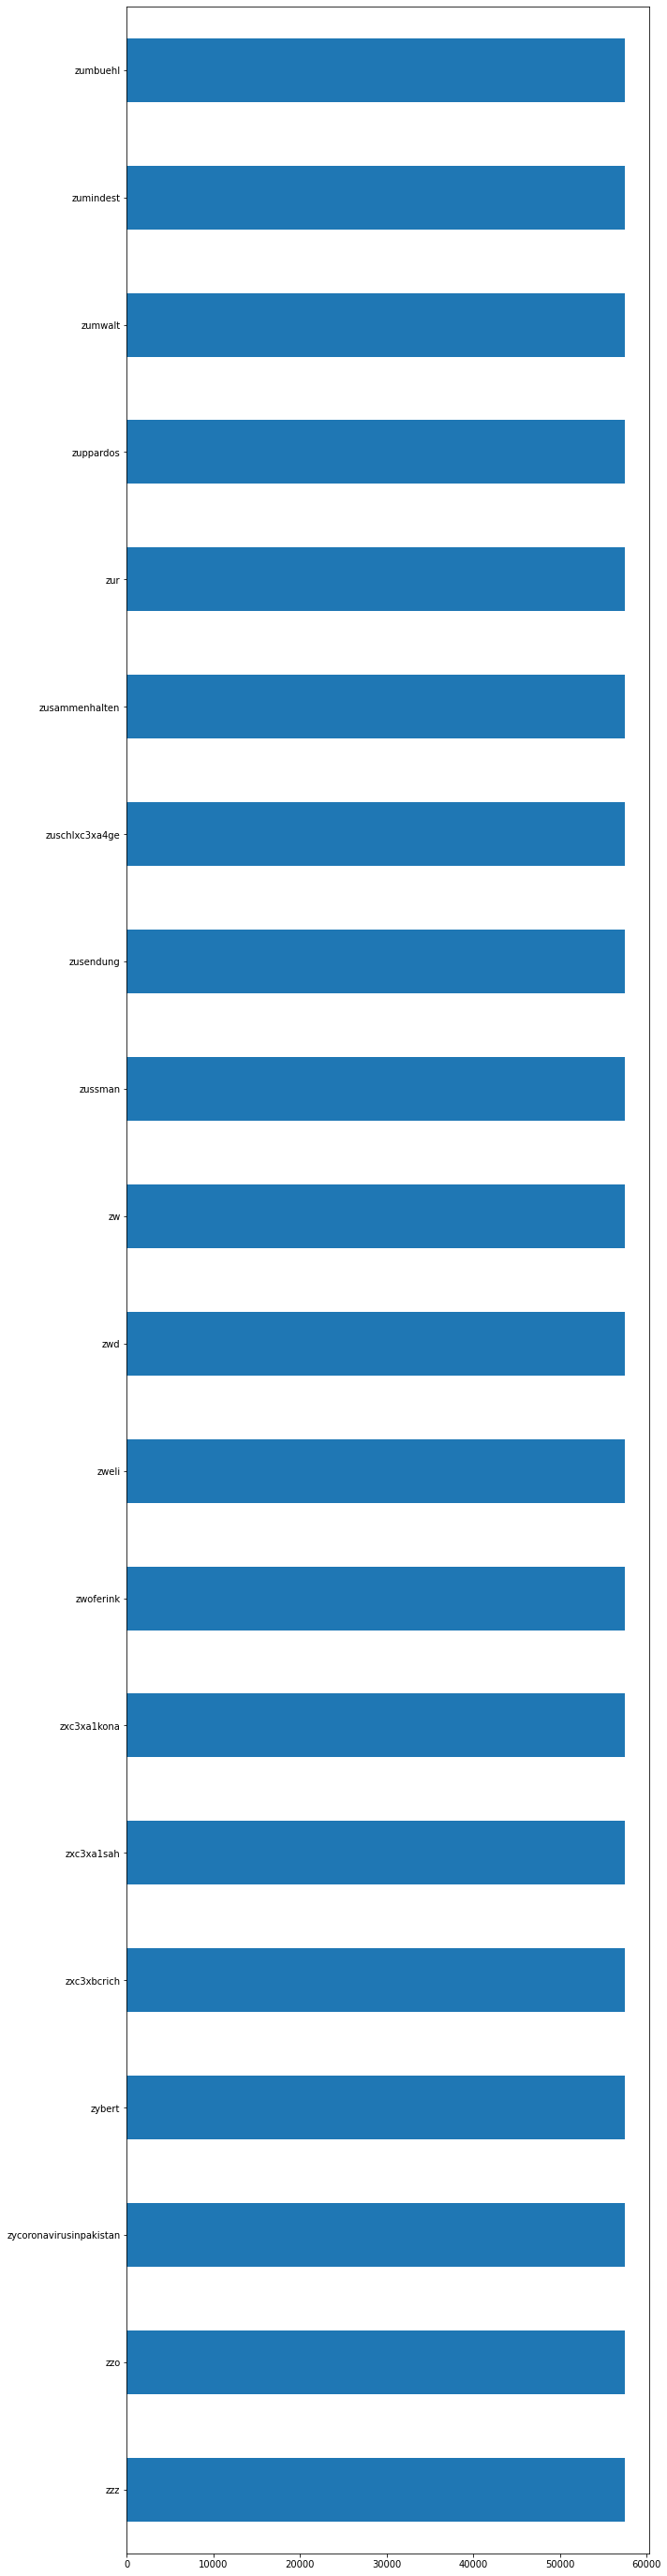

In [66]:
top_vocab = vocab_d.head(20)
top_vocab.plot(kind = 'barh', figsize = (10,50))










# classification prediction bais due to class imbalance

when performing classification the imbalace in number of training samples of each class may cause the model to train in favour of the majority class

In [67]:
ex_negative_sort = data_t[data_t.Sentiment == 'Extremely Negative'].sample(5000)

ex_negative_sort.shape

(5000, 6)

In [68]:
negative_sort = data_t[data_t.Sentiment == 'Negative'].sample(5000)

negative_sort.shape

(5000, 6)

In [69]:
neutral_sort = data_t[data_t.Sentiment == 'Neutral'].sample(5000)

neutral_sort.shape 

(5000, 6)

In [70]:
positive_sort = data_t[data_t.Sentiment == 'Positive'].sample(5000)

positive_sort.shape

(5000, 6)

In [71]:
ex_positive_sort = data_t[data_t.Sentiment == 'Extremely Positive'].sample(5000)

ex_positive_sort.shape

(5000, 6)

In [101]:
sorted_data = pd.concat([ negative_sort, neutral_sort, ex_positive_sort, ex_negative_sort,positive_sort], ignore_index = True)


In [102]:
sorted_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,6835,51787,NaN,18-03-2020,oil price benchmark plummet low price mainly 1...,Negative
1,15776,60728,NaN,20-03-2020,dge1 s currently medicine shortage result covi...,Negative
2,29526,74478,"5700 Orange, Cypress, CA 90630",01-04-2020,ze march covid19 case begin rapidly trend up...,Negative
3,11581,56533,NaN,19-03-2020,-pron- community face challenging time fear co...,Negative
4,11984,56936,"Vancouver, British Columbia",19-03-2020,alberta announce new emergency payment covid19...,Negative
...,...,...,...,...,...,...
24995,24297,69249,NaN,25-03-2020,hand sanitizer mask reach mps early morning -p...,Positive
24996,36589,81541,"Kentucky, USA",07-04-2020,socioeconomic status influence consumer experi...,Positive
24997,26473,71425,NaN,25-03-2020,ontv good question -pron- ready deal covid 19 ...,Positive
24998,6007,50959,Melbourne,17-03-2020,australian doctor issue urgent plea government...,Positive


In [103]:
corpus = sorted_data['OriginalTweet']

In [104]:
corpus = [i for i in corpus]

In [106]:
label_length = [i for i in sorted_data['Sentiment'].sort_values().value_counts()]

In [107]:
label = [i for i in sorted_data['Sentiment'].sort_values().value_counts().index]

In [108]:
sorted_data['Sentiment'].sort_values().value_counts()

Negative              5000
Neutral               5000
Extremely Positive    5000
Extremely Negative    5000
Positive              5000
Name: Sentiment, dtype: int64

In [109]:
print(label)
label_length

['Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative', 'Positive']


[5000, 5000, 5000, 5000, 5000]

In [110]:
labels =[]
for i in range(len(label)):
    new = [label[i]] * label_length[i]
    labels.extend(new)
    
len(labels)

25000

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [132]:
tfidf = TfidfVectorizer ( stop_words = stop_words_lemma, tokenizer = lemmatizer, ngram_range = (2,2))

m_nb = MultinomialNB()

pipe = Pipeline([('vectoriser', tfidf), 
                ('classifier', m_nb)])

In [133]:
#tfidf?
#m_nb?

In [134]:
pipe.fit(corpus, labels)

C:\Users\Omona\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['-pron-'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(steps=[('vectoriser',
                 TfidfVectorizer(ngram_range=(2, 2),
                                 stop_words={"'", "'s", '-PRON-', 'a', 'about',
                                             'above', 'across', 'after',
                                             'afterwards', 'again', 'against',
                                             'all', 'almost', 'alone', 'along',
                                             'already', 'also', 'although',
                                             'always', 'among', 'amongst',
                                             'amount', 'an', 'and', 'another',
                                             'any', 'anyhow', 'anyone',
                                             'anything', 'anyway', ...},
                                 tokenizer=<function lemmatizer at 0x0000008BE7E2D828>)),
                ('classifier', MultinomialNB())])

In [135]:
print("Training accuracy: {}".format(pipe.score(corpus, labels)))

Training accuracy: 0.97904


In [137]:
#pipe['vectoriser'].get_feature_names()

# Predicting using test data set

In [141]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report

In [164]:
data_test = pd.read_csv('Corona_NLP_test.csv')

In [181]:
data_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING New Yorkers encounter empty supermark...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldnt find hand sanitizer at Fred Mey...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,Panic buying hits NewYork City as anxious shop...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,toiletpaper dunnypaper coronavirus coronavirus...,Neutral


# Preprocessing 

In [166]:
data_test.OriginalTweet = data_test['OriginalTweet'].astype('string')

In [167]:
extract_url1 = data_test['OriginalTweet'].str.extract(r'(http\S+|www.\S+)')

In [168]:
data_test['OriginalTweet'] = data_test.OriginalTweet.str.replace( r'(http\S+|www.\S+)', '', case = False, regex = True)

In [169]:
data_test['OriginalTweet'] = data_test.OriginalTweet.str.replace('@.......', '', case = False, regex = True)

In [184]:
gib_test = ['\r', '\n', '\x92', '\x85', '\x96', '\x92', '\x95' , '\xa0', '\x93' ]

for i in gib_test:
    data_test['OriginalTweet'] = data_test.OriginalTweet.str.replace (i, '', case = False, regex = False)

In [187]:
data_test['OriginalTweet'] = data_test.OriginalTweet.apply(remove_punctuation)

In [188]:
data_test['OriginalTweet'] = data_test.OriginalTweet.apply(stop_words)

In [206]:
test_corpus = data_test['OriginalTweet'][:50]

In [207]:
test_corpus = [i for i in test_corpus]



In [190]:
#[i for i in data_test['OriginalTweet']]

In [208]:
label

['Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative', 'Positive']

In [209]:
y_proba = pipe.predict_proba(test_corpus)



In [210]:
predicted_indices = (y_proba[:, 1] > 0.5).astype(int)

for i, index in enumerate(predicted_indices):
    print(test_corpus[i], "--> {} at {:g}%".format(label[index], 100*y_proba[i, index]))

trending new yorkers encounter supermarket shelf picture wegmans brooklyn soldout online grocer foodkick maxdelivery coronavirusfeare shopper stock   --> Negative at 23.4194%
-pron- find hand sanitizer fred meyer -pron- turn amazon 11497 2 pack purellcheck   coronavirus concern drive price --> Negative at 10.5858%
find -pron- protect -pron- love coronavirus --> Neutral at 60.877%
panic buying hit newyork city anxious shopper stock foodampmedical supply healthcare worker -pron- 30 bigapple 1st confirm coronavirus patient bloomberg stage eventqanon qanon2018 qanon2020 election2020 cdc --> Negative at 23.1762%
toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid19 9news   corvid19 7newsmelb dunnypapergate costco     week buy baby milk powder buy toilet paper --> Negative at 28.9123%
-pron- remember time -pron- pay 299 gallon regular gas los angelesprices pump look coronavirus impact price 4 p.m. abc7 --> Negative at 15.9724%
vote age coronavirus   hand sanitizer